# krigingを実装する

In [1]:
import calc_variogram as variogram
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
import scipy.optimize as opt
import statsmodels.api as sm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# データの用意
data = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/house_price_raw.csv')
data['price'] = np.log(data.price)
data = data[['px', 'py', 'price']].values

In [4]:
#バリオグラムの実装
vario = variogram.get_diff(data)

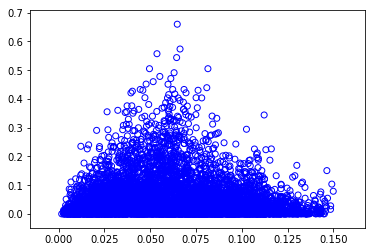

In [5]:
plt.scatter(vario[0], vario[1], facecolors = 'None', edgecolors = 'blue')

In [12]:
e_vario = variogram.emp_variogram(vario, 14)

In [13]:
var, edge, bins = stats.binned_statistic(vario[0], vario[1], statistic=np.var, bins=14)

In [14]:
e_vario[1]/var

array([27.55802626, 19.63073824, 15.76495046, 10.97836938,  9.62527529,
        7.69857213,  8.3486969 , 11.10741175, 18.53175332, 19.13694097,
       15.30346081, 34.72986483, 20.78473127, 27.82177119])

In [15]:
print(e_vario[1])
print(var)

[0.01663077 0.029572   0.04161021 0.05944551 0.06321961 0.07412669
 0.05219553 0.04277687 0.03489631 0.0316839  0.02538724 0.01870688
 0.01874416 0.0262152 ]
[0.00060348 0.00150641 0.00263941 0.00541479 0.00656808 0.00962863
 0.00625194 0.0038512  0.00188305 0.00165564 0.00165892 0.00053864
 0.00090182 0.00094225]


[ 0.00000000e+00  1.00000000e+02  5.53698639e-02 -1.82289447e-01]
liner:0.0009176464556448057
[1.00000000e+00 1.00000000e+02 3.88499790e-02 3.83289628e-10
 1.00000000e+02]
[2.00000000e+00 1.00000000e+02 3.88499790e-02 5.47784812e-09
 1.00000000e+02]
[3.00000000e+00 1.00000000e+02 3.88499790e-02 5.94964026e-09
 1.00000000e+02]
[0.         0.0183234  0.0366468  0.0549702  0.0732936  0.09161699
 0.10994039 0.12826379 0.14658719 0.16491059]
0.05536986394841165 -0.1822894472647929
[ 0.00000000e+00  1.00000000e+02  5.53698639e-02 -1.82289447e-01]
[ 0.00000000e+00  1.00000000e+02  5.35676995e-02 -1.69874105e-01]
liner:0.0012459227591686468
[1.00000000e+00 1.00000000e+02 3.85926383e-02 4.43111920e-10
 1.00000000e+02]
[2.00000000e+00 1.00000000e+02 3.85926383e-02 6.89262327e-09
 1.00000000e+02]
[3.00000000e+00 1.00000000e+02 3.85926383e-02 7.54229251e-09
 1.00000000e+02]
[0.         0.0183234  0.0366468  0.0549702  0.0732936  0.09161699
 0.10994039 0.12826379 0.14658719 0.16491059]
0.0535676995

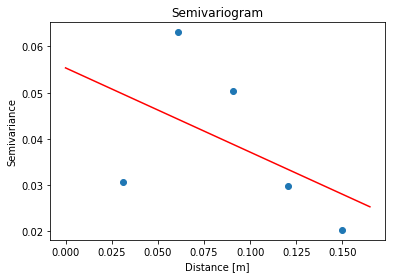

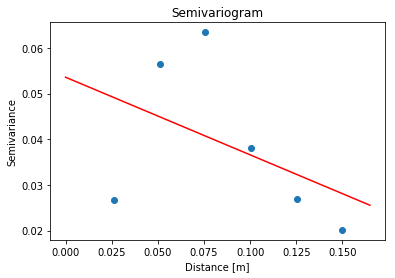

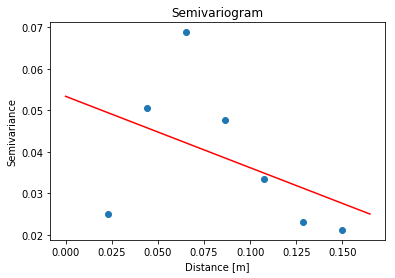

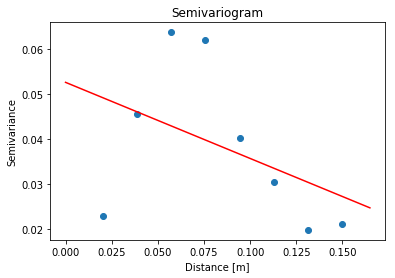

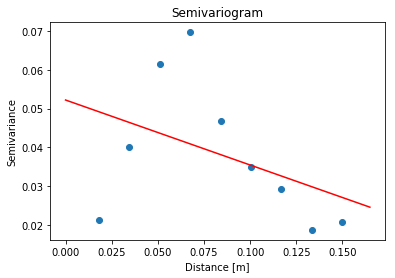

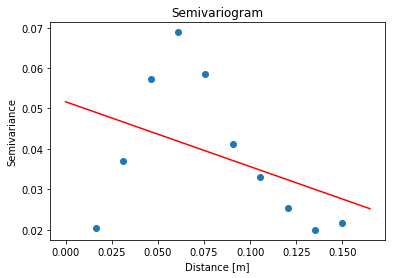

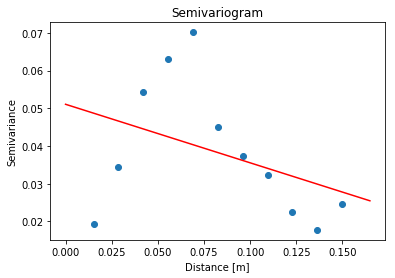

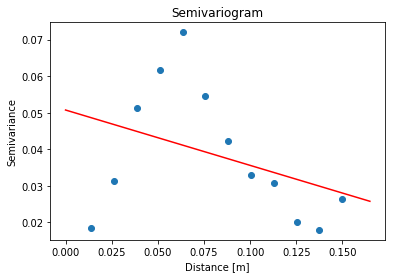

In [17]:
param, lag_num, fig = variogram.auto_vario(vario, range(5,13))

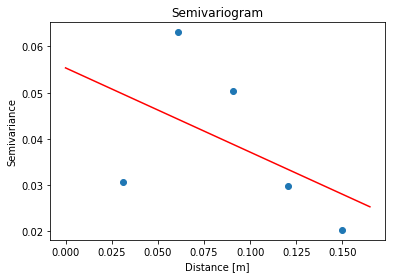

In [18]:
fig # 最小二乗誤差を最小化するbins, model, parameterのバリオグラム

In [19]:
print(param)
print(lag_num)

[ 0.00000000e+00  1.00000000e+02  5.53698639e-02 -1.82289447e-01]
5


## krigingを実装する
 - step1~4

### Step1 OLS残差を導出

In [26]:
data = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/house_price_raw.csv')
data['price'] = np.log(data.price)

In [27]:
data.head()

,px,py,price,station,tokyo
0,139.362310,35.733850,11.938193,0.010620,0.408220
1,139.363027,35.654078,12.055250,0.011653,0.405010
2,139.367082,35.659859,12.287653,0.010110,0.400614
3,139.369003,35.645546,12.061047,0.004172,0.399719
4,139.371526,35.647323,12.013701,0.007247,0.397050


In [28]:
x = data[['station', 'tokyo']]
y = data['price']

In [29]:
step1 = sm.OLS(y, x)
step1_res = step1.fit()

In [30]:
step1_res.summary()  # 駅距離の係数がプラスになっているのはおかしい

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.337e+04
Date:                Mon, 11 Mar 2019   Prob (F-statistic):          1.94e-147
Time:                        09:57:14   Log-Likelihood:                -158.76
No. Observations:                 128   AIC:                             321.5
Df Residuals:                     126   BIC:                             327.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
station       53.2124     18.775      2.834      0.005      16.057      90.368
tokyo         33.2437      0.480     69.221      0.000      32.293      34.194
==============================================================================
Omnibus:                        5.919   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.152
Skew:                          -0.408   Prob(JB):                       0.0761
Kurtosis:                       2.452   Cond. No.                         89.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

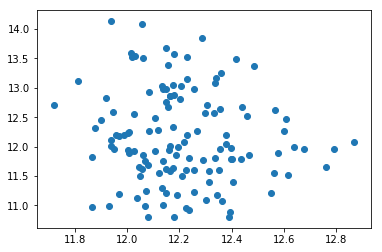

In [25]:
plt.scatter(y, step1_res.fittedvalues)

In [31]:
resid = step1_res.resid

### Step2: Estimation of Semivariogram

 - 残差から理論バリオグラムを求める

In [32]:
resid = pd.DataFrame(resid, columns=['residuals'])
resid = data[['px', 'py']].join(resid)
resid = resid.values

In [33]:
vario = variogram.get_diff(resid)

In [34]:
vario[0]

array([0.07977522, 0.07414472, 0.08855728, ..., 0.00499936, 0.01262236,
       0.00762327])

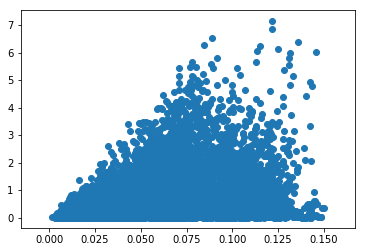

In [35]:
plt.scatter(vario[0], vario[1])

In [38]:
e_vario = variogram.emp_variogram(vario, 14)

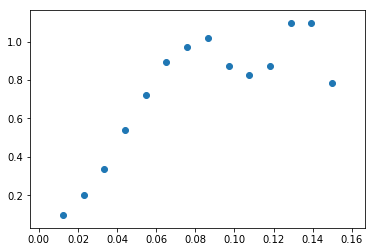

In [39]:
plt.scatter(e_vario[0], e_vario[1])

[  0.         100.           0.12886432   5.91522986]
[1.00000000e+00 1.00000000e+02 1.86906671e-14 4.77667570e-01
 2.28943090e-02]
[2.00000000e+00 1.00000000e+02 2.25171265e-19 5.51198245e-01
 2.89466167e-02]
[3.00000000e+00 1.00000000e+02 1.20431212e-17 4.73288626e-01
 4.96360259e-02]
[0.        0.0091617 0.0183234 0.0274851 0.0366468 0.0458085 0.0549702
 0.0641319 0.0732936 0.0824553]
[0.        0.0091617 0.0183234 0.0274851 0.0366468 0.0458085 0.0549702
 0.0641319 0.0732936 0.0824553] 0.4776675698026676 0.0228943089808116
[1.00000000e+00 1.00000000e+02 1.86906671e-14 4.77667570e-01
 2.28943090e-02]


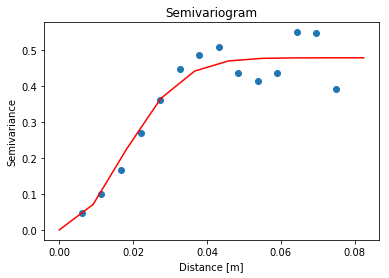

In [42]:
param, lag, fig = variogram.auto_vario(vario, 14)

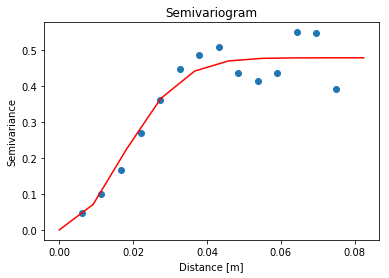

In [43]:
fig

In [44]:
print(param)

[1.00000000e+00 1.00000000e+02 1.86906671e-14 4.77667570e-01
 2.28943090e-02]


### Step3: Estimation of Mean function(param of coefficient)
 - 重みの推定量$\hat{\Sigma} = (\hat{C}(s_i - s_j))_{ij}$
 - $\hat{C}(s_i - s_j) = \hat{C}(0) - \gamma(s_i - s_j; \hat{\theta})$
 - $\hat{C}(0) = \lim_{h\to\infty} \gamma(h;\theta)$

#### Todo
- これ以降の部分の関数化

ガウス型なので有効レンジは$\sqrt{3}r$

In [45]:
ef_range = np.sqrt(3)*param[4]

In [47]:
c0 = variogram.gaussian_model(ef_range, param[2], param[3], param[4])

In [49]:
print(c0)

0.45388590184780947


In [52]:
len(resid)

128

In [53]:
points = data[['px', 'py']].values
distance = scipy.spatial.distance.pdist(points)
distance =scipy.spatial.distance.squareform(distance)

In [54]:
print(distance)

[[0.         0.07977522 0.07414472 ... 0.1456904  0.14342874 0.14034726]
 [0.07977522 0.         0.00706137 ... 0.10275067 0.10323014 0.10451886]
 [0.07414472 0.00706137 0.         ... 0.10051429 0.10066822 0.10147933]
 ...
 [0.1456904  0.10275067 0.10051429 ... 0.         0.00499936 0.01262236]
 [0.14342874 0.10323014 0.10066822 ... 0.00499936 0.         0.00762327]
 [0.14034726 0.10451886 0.10147933 ... 0.01262236 0.00762327 0.        ]]


In [66]:
def call_model(x, param):
    if param[0] == 0:
        return variogram.liner_model(x, param[2], param[3])
    if param[0] == 1:
        return lambda x: param[3] * np.exp(-x**2 / param[4])
    if param[0] == 2:
        return variogram.exponential_model(x, param[2], param[3], param[4])
    if param[0] == 3:
        return variogram.spherical_model(x, param[2], param[3], param[4])

In [69]:
def est_covario(x, param, c0):
    cond = [x <= 0, x > 0]
    func = [c0, call_model(x, param)]
    return np.piecewise(x, cond, func)

In [73]:
est_sigma = np.vectorize(est_covario, excluded=[1])

In [75]:
sigma_hat = est_sigma(distance, param, c0)

In [93]:
pd.DataFrame(sigma_hat).iloc[0:8, 0:8]

,0,1,2,3,4,5,6,7
0,0.453886,0.361745,0.375701,0.339125,0.343156,0.474222,0.404262,0.359073
1,0.361745,0.453886,0.476628,0.475409,0.475215,0.375400,0.467412,0.474837
2,0.375701,0.476628,0.453886,0.473336,0.473991,0.390206,0.472834,0.475740
3,0.339125,0.475409,0.473336,0.453886,0.477469,0.355654,0.461339,0.475516
4,0.343156,0.475215,0.473991,0.477469,0.453886,0.360425,0.463687,0.476538
5,0.474222,0.375400,0.390206,0.355654,0.360425,0.453886,0.419826,0.376947
6,0.404262,0.467412,0.472834,0.461339,0.463687,0.419826,0.453886,0.469982
7,0.359073,0.474837,0.475740,0.475516,0.476538,0.376947,0.469982,0.453886


In [97]:
def convert_with_decomposition(mat, eps=0.0001):
    """
    K' = P D' P^T
    P: eigen vectors matrix
    D: diag eigen values matrix
    D': negative eigen values of D are \epsilon
    """
    eigen_values, eigen_vectors_mat = np.linalg.eig(mat)
    eigen_values[eigen_values <= 0] = eps
    # K' = P D' P^T
    mat_positive_definite = eigen_vectors_mat.dot(np.diag(eigen_values)).dot(eigen_vectors_mat.T)
    return mat_positive_definite

正定値でないとエラーを起こすため, 類似の正定値行列へと変換する

In [110]:
sigma_hat_pd = convert_add_lmd(sigma_hat)

In [111]:
gls_mod = sm.GLS(y, x, sigma=sigma_hat_pd)

In [112]:
gls_res = gls_mod.fit()
gls_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.289
Model:                            GLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     25.64
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           4.54e-10
Time:                        11:16:08   Log-Likelihood:                 57.446
No. Observations:                 128   AIC:                            -110.9
Df Residuals:                     126   BIC:                            -105.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
station      -21.7684      3.260     -6.678      0.000     -28.220     -15.317
tokyo         32.7490     12.280      2.667      0.009       8.447      57.051
==============================================================================
Omnibus:                        1.757   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.279
Skew:                           0.203   Prob(JB):                        0.528
Kurtosis:                       3.274   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
coeff = gls_res.params

In [115]:
print(coeff)

station   -21.768444
tokyo      32.748996
dtype: float64


In [145]:
resid_gls = gls_res.resid

### Step4: Kriging
 - $\hat{Y}(s_0) = X'(s_0)\hat{\beta}_{fgls} + c'\hat{\Sigma}^{-1}(Y - X'\hat{\beta}_{fgls})$
 - $c = (\hat{C}(s_i - s_{0,j}))_{i,j}$

In [117]:
data.head()

,px,py,price,station,tokyo
0,139.362310,35.733850,11.938193,0.010620,0.408220
1,139.363027,35.654078,12.055250,0.011653,0.405010
2,139.367082,35.659859,12.287653,0.010110,0.400614
3,139.369003,35.645546,12.061047,0.004172,0.399719
4,139.371526,35.647323,12.013701,0.007247,0.397050


In [118]:
mdat = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/house_price_pred.csv')

In [119]:
mdat.head()

,px,py,price,station,tokyo
0,139.402984,35.767626,NaN,0.017537,0.374249
1,139.407036,35.767626,NaN,0.013571,0.370307
2,139.411089,35.767626,NaN,0.009675,0.366367
3,139.439457,35.767626,NaN,0.001584,0.338865
4,139.394878,35.763700,NaN,0.026327,0.381271


$X'(s_0)\hat{\beta}_{fgls}$

In [152]:
fitted_val = gls_res.predict(exog=mdat[['station', 'tokyo']])

距離行列を計算する

In [120]:
m_points = mdat[['px', 'py']].values

In [141]:
print(len(m_points))

540


In [126]:
print(m_points[0])

[139.4029835   35.76762601]


In [134]:
np.array([variogram.pdist(np.vstack([m_points[0], point])) for point in points])

array([[0.0528692 ],
       [0.12037306],
       [0.11358982],
       [0.12672097],
       [0.12434785],
       [0.04968004],
       [0.09861384],
       [0.11712259],
       [0.10812436],
       [0.10227943],
       [0.09170956],
       [0.08902305],
       [0.1154376 ],
       [0.05069573],
       [0.12078642],
       [0.11638864],
       [0.09773925],
       [0.12106875],
       [0.09042739],
       [0.04401398],
       [0.12399824],
       [0.04184901],
       [0.07247599],
       [0.10346477],
       [0.04628487],
       [0.11215029],
       [0.11881184],
       [0.10564649],
       [0.08542035],
       [0.07756917],
       [0.06994277],
       [0.09117718],
       [0.10793187],
       [0.11262916],
       [0.08388829],
       [0.0885734 ],
       [0.04056393],
       [0.06825009],
       [0.07475439],
       [0.09367953],
       [0.04550486],
       [0.03438163],
       [0.07694747],
       [0.10003043],
       [0.11130226],
       [0.11860069],
       [0.07431223],
       [0.099

In [138]:
np.array([variogram.pdist(np.vstack([m_points[1], point])) for point in points])

array([[0.05604679],
       [0.12177829],
       [0.11493502],
       [0.1278673 ],
       [0.12543437],
       [0.05218235],
       [0.09986324],
       [0.118167  ],
       [0.10921361],
       [0.10336687],
       [0.09282981],
       [0.09016058],
       [0.11629923],
       [0.05258999],
       [0.12154162],
       [0.11717115],
       [0.09853755],
       [0.12171334],
       [0.09123011],
       [0.0456289 ],
       [0.1245469 ],
       [0.04332914],
       [0.07331126],
       [0.10404572],
       [0.04754943],
       [0.11263065],
       [0.11925405],
       [0.10613922],
       [0.0860274 ],
       [0.07815507],
       [0.07040557],
       [0.09152953],
       [0.10822175],
       [0.11287604],
       [0.08419242],
       [0.088739  ],
       [0.0408142 ],
       [0.06836417],
       [0.0748513 ],
       [0.09375372],
       [0.04563246],
       [0.03451948],
       [0.07694398],
       [0.10002673],
       [0.11123728],
       [0.11849884],
       [0.07404703],
       [0.098

In [139]:
# 予測地点と観測地点距離行列cを作成する
m_list = []
for m_point in m_points:
    column = np.array([variogram.pdist(np.vstack([m_point, point])) for point in points])
    m_list.append(column)
c_mat = np.hstack(m_list)

In [148]:
pd.DataFrame(c_mat).iloc[0:8, 0:8]

,0,1,2,3,4,5,6,7
0,0.052869,0.056047,0.059331,0.084217,0.044178,0.047245,0.050452,0.053772
1,0.120373,0.121778,0.123301,0.136875,0.114156,0.115352,0.116677,0.118126
2,0.113590,0.114935,0.116406,0.129815,0.107497,0.108615,0.109872,0.111262
3,0.126721,0.127867,0.129131,0.140951,0.120954,0.121885,0.122943,0.124125
4,0.124348,0.125434,0.126641,0.138157,0.118697,0.119560,0.120554,0.121674
5,0.049680,0.052182,0.054870,0.077101,0.041928,0.044127,0.046575,0.049235
6,0.098614,0.099863,0.101260,0.114625,0.092745,0.093722,0.094863,0.096161
7,0.117123,0.118167,0.119340,0.130812,0.111570,0.112374,0.113317,0.114396


In [142]:
c_hat = est_sigma(c_mat, param, c0)  # 距離行列に共分散関数を適用

In [147]:
pd.DataFrame(c_hat).iloc[0:8, 0:8]

,0,1,2,3,4,5,6,7
0,0.422769,0.416426,0.409590,0.350417,0.438634,0.433295,0.427407,0.420994
1,0.253667,0.249924,0.245884,0.210735,0.270349,0.267126,0.263563,0.259674
2,0.271875,0.268248,0.264291,0.228799,0.288351,0.285323,0.281921,0.278161
3,0.236869,0.233869,0.230576,0.200564,0.252118,0.249639,0.246831,0.243705
4,0.243115,0.240250,0.237078,0.207513,0.258146,0.255837,0.253185,0.250201
5,0.428851,0.424103,0.418807,0.368433,0.442362,0.438722,0.434487,0.429677
6,0.312358,0.308993,0.305226,0.269082,0.328063,0.325462,0.322418,0.318944
7,0.262366,0.259565,0.256425,0.226215,0.277330,0.275158,0.272611,0.269701


$c'\hat{\Sigma}^{-1}$

In [150]:
krig_weight = np.dot(c_hat.T, np.linalg.inv(sigma_hat))

$\hat{Y}(s_0) = X'(s_0)\hat{\beta}_{fgls} + c'\hat{\Sigma}^{-1}(Y - X'\hat{\beta}_{fgls})$

In [153]:
kriging_pred_val = fitted_val + np.dot(krig_weight, resid_gls)

Rで予測した場合との比較

In [158]:
res_inR = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/krig_res_R.csv')
res_inR = res_inR.iloc[:, 1:-2]

In [159]:
res_inR.head()

,px,py,var1.pred
0,139.402984,35.767626,11.646464
1,139.407036,35.767626,11.709496
2,139.411089,35.767626,11.776675
3,139.439457,35.767626,12.073558
4,139.394878,35.763700,11.524789


Text(0, 0.5, 'pred by Python')

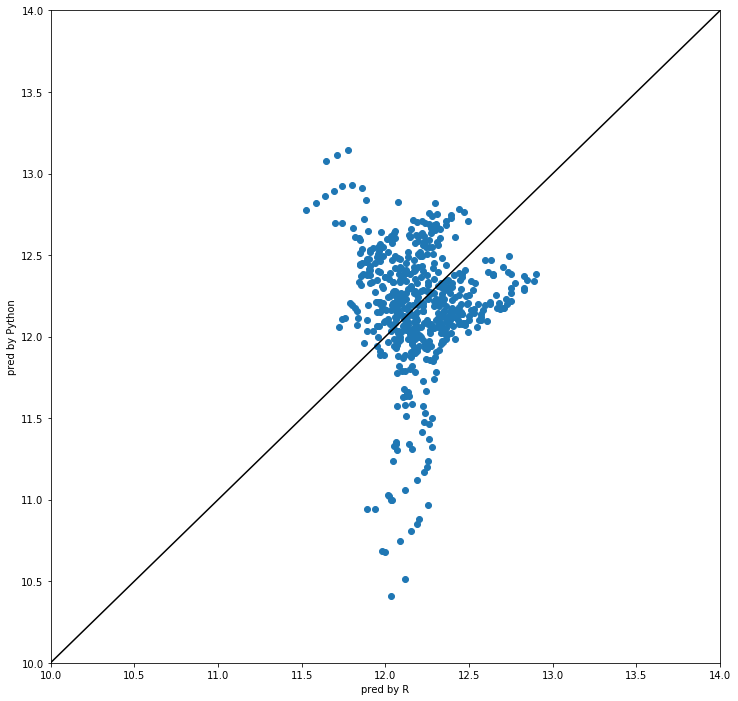

In [175]:
res_fig = plt.figure(figsize=(12, 12))
res_ax = res_fig.add_subplot(1, 1, 1)
res_ax.scatter(res_inR['var1.pred'], kriging_pred_val)
res_ax.plot(np.linspace(10, 14, 1000), np.linspace(10, 14, 1000), color='black')
res_ax.set_xlim(10, 14)
res_ax.set_ylim(10, 14)
res_ax.set_xlabel('pred by R')
res_ax.set_ylabel('pred by Python')

In [176]:
res_fig.savefig('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/plot/kriging_res_with_Python.png')